In [14]:
import io
import numpy as np    
from PIL import Image
from scipy import ndimage
from IPython.display import display # to display images
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches
from skimage.segmentation import clear_border
from skimage.color import label2rgb
from skimage import morphology
from matplotlib import pyplot as plt

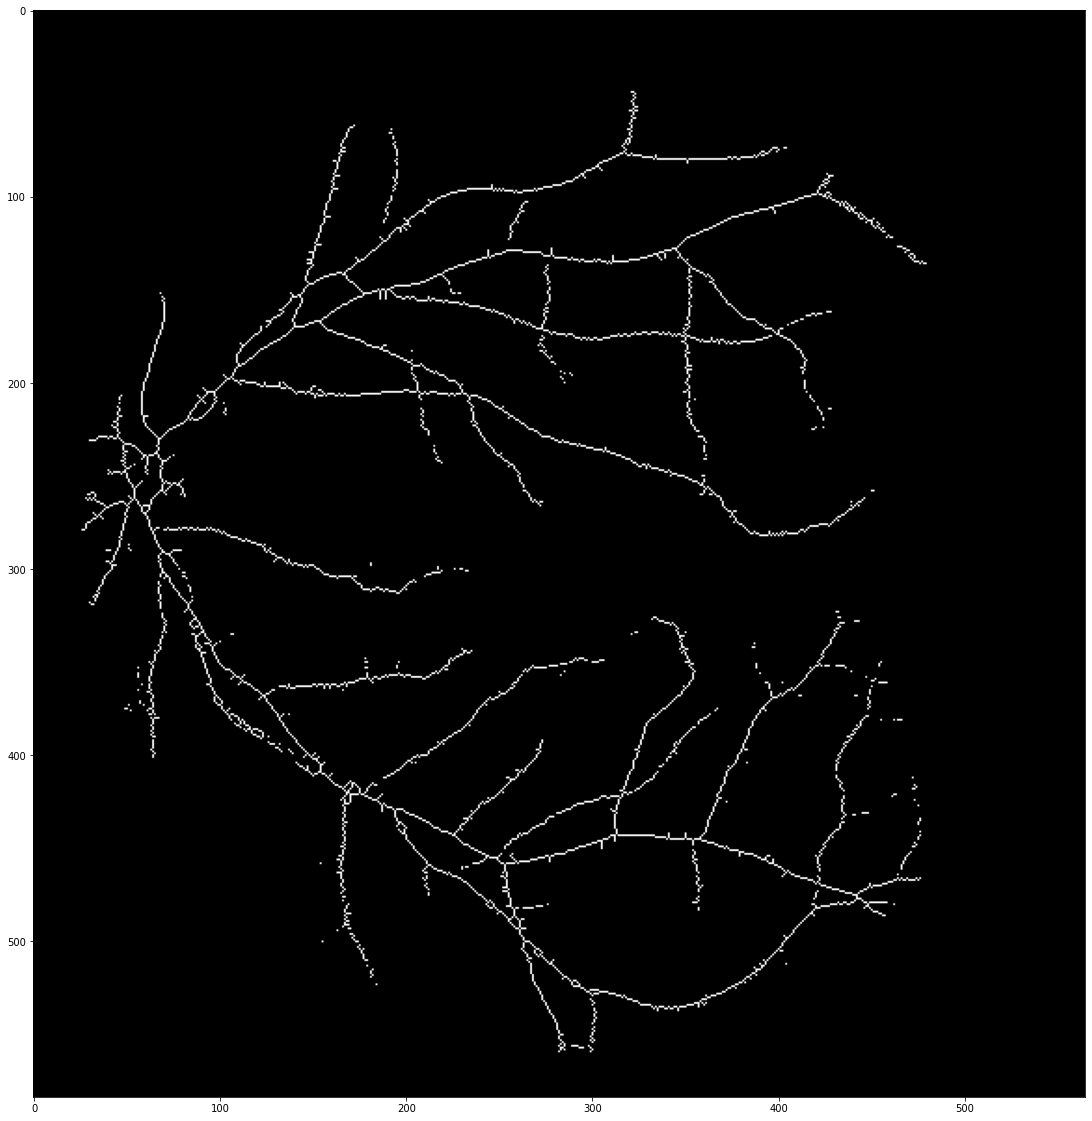

In [16]:
image_string = open('image/skeleton/21_bloodvessel.png', 'rb').read()
img = Image.open(io.BytesIO(image_string))
arr = np.asarray(img)
plt.figure(figsize=(20,20))
plt.imshow(img, cmap='gray')

In [17]:
bifurcations_list = list()
trifuractions_list = list()

bifurcations = [
    [[1,0,1],
     [0,1,0],
     [0,1,0]],

     [[0,0,1],
      [1,1,0],
      [0,1,0]],

     [[1,0,0],
      [0,1,1],
      [0,1,0]],

     [[0,1,0],
      [0,1,1],
      [0,0,0]],


      [[0,1,0],
       [1,1,0],
       [0,0,0]],


     [[0,0,0],
      [0,1,1],
      [0,1,0]]


]

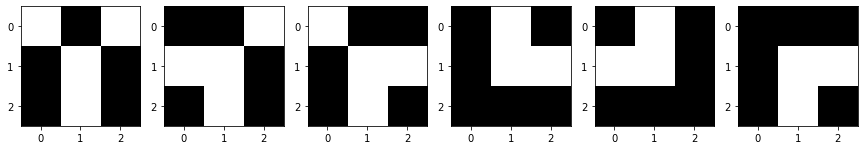

In [18]:
fig,ax = plt.subplots(1,6,figsize=(15,3))

for i, idx in enumerate(bifurcations):
  ax[i].imshow(bifurcations[i], cmap = 'gray')

In [19]:
for i in range(4):
    for j in  range(len(bifurcations)):
        bifurcations_list.append(np.rot90(bifurcations[j],i))



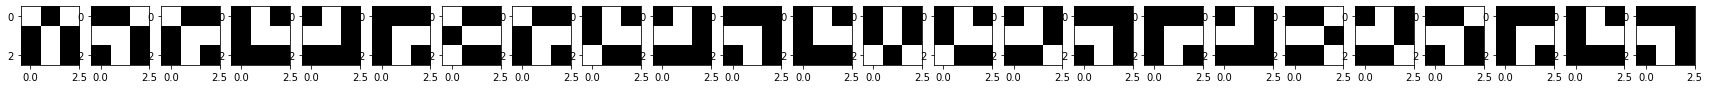

In [20]:
fig,ax = plt.subplots(1,len(bifurcations_list),figsize=(30,3))

for i, idx in enumerate(bifurcations_list):
  ax[i].imshow(bifurcations_list[i], cmap = 'gray')

In [21]:
trifuractions  = [
    [[0,0,0,0,0],
     [0,0,1,0,0],
     [0,0,1,0,0],
     [0,1,1,1,0],
     [1,0,1,0,1]],

     [[0,0,1,0,0],
      [0,0,1,0,0],
      [0,1,1,1,0],
      [1,0,1,0,1],
      [1,0,1,0,1]],

    [[0,0,1,0,0],
     [0,1,1,0,0],
     [1,0,1,1,1],
     [0,0,1,0,0],
     [0,0,1,0,0]],

    [[1,0,1,0,0],
     [0,1,1,0,0],
     [0,0,1,1,1],
     [0,0,1,0,0],
     [0,0,1,0,0]],

    [[0,1,1,0,0],
     [0,1,1,0,0],
     [0,0,1,1,1],
     [0,0,1,0,0],
     [0,0,1,0,0]],

    [[0,0,1,0,0],
     [1,1,1,0,0],
     [0,0,1,1,1],
     [0,0,1,0,0],
     [0,0,1,0,0]],
    [
        [0,0,0,1,0,0,0],
        [0,0,0,1,0,0,0],
        [0,0,1,1,1,0,0],
        [0,1,0,1,0,1,0],
        [1,0,0,1,0,0,1],
    ],
    [
        [0,0,0,0,0,0,0],
        [0,0,0,1,0,0,0],
        [0,0,1,1,1,0,0],
        [0,1,0,1,0,1,0],
        [1,0,0,1,0,0,1],
    ],


]

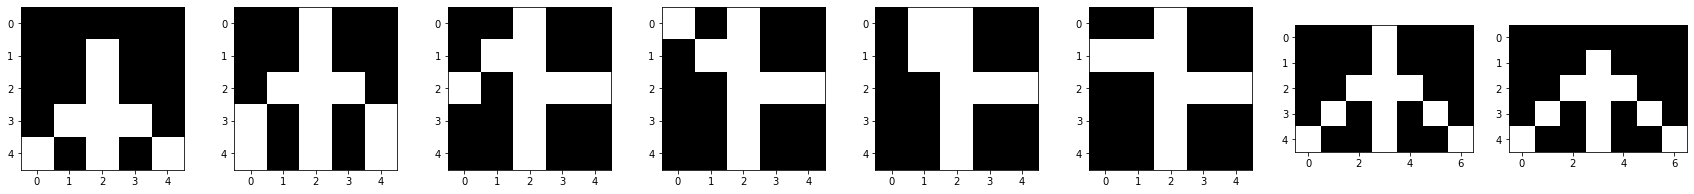

In [22]:
fig,ax = plt.subplots(1,len(trifuractions),figsize=(30,3))

for i, idx in enumerate(trifuractions):
  ax[i].imshow(trifuractions[i], cmap = 'gray')

In [23]:
for i in range(4):
    for j in  range(len(trifuractions)):
        trifuractions_list.append(np.rot90(trifuractions[j],i))
#         trifuractions_list.append(np.flip(trifuractions[j],0))
#         trifuractions_list.append(np.flip(trifuractions[j],1))

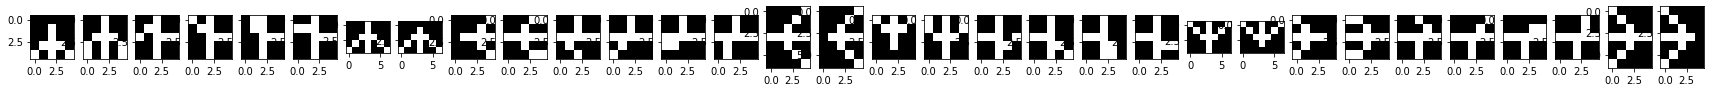

In [24]:
fig,ax = plt.subplots(1,len(trifuractions_list),figsize=(30,10))

for i, idx in enumerate(trifuractions_list):
  ax[i].imshow(trifuractions_list[i], cmap = 'gray')

# Searching for patterns

## Birfurcations

d:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


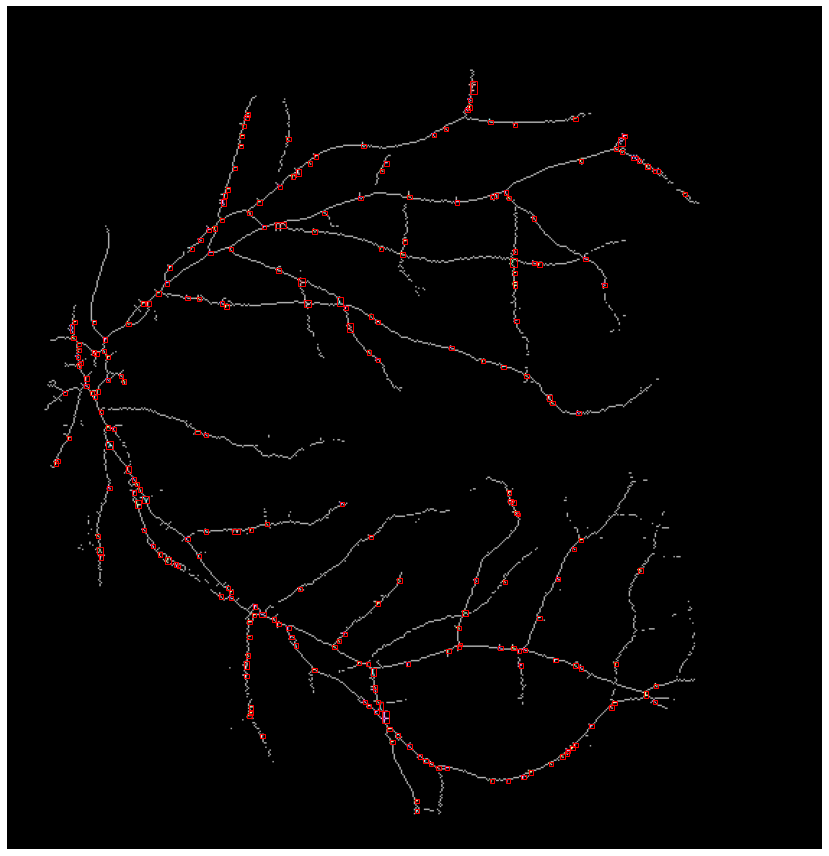

In [25]:
result = 0
for bif in bifurcations_list:
    result = result + ndimage.binary_hit_or_miss(arr, bif).astype(np.int)
# founded = np.where(result == 1)
result=morphology.dilation(result)

# remove artifacts connected to image border
cleared = clear_border(result)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=arr, bg_label=0)

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 1:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

## Trifurcations

d:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


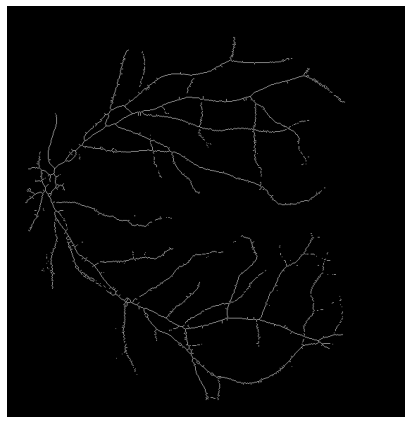

In [26]:
result = 0
for trif in trifuractions_list:
    result = result + ndimage.binary_hit_or_miss(arr, trif).astype(np.int)
# founded = np.where(result == 1)
result=morphology.dilation(result)

# remove artifacts connected to image border
cleared = clear_border(result)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=arr, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 1:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='green', linewidth=1)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()